In [1]:
import numpy as np
from utils import getLoaderDataset
from model import GPT
from train import Training
from utils import generate
from utils import Args
from utils import LoadedModel
from utils import CharDataSet
import torch
import os


# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [32,64,128,256]
B = [32,64,128,256]
L = [6,12,18,24]
h = [4,8,12,16]
d = [64,128,256,768]
dff = 4 * d
learning_rate = [1e-4,1e-3,1e-2,1e-1]
use_lr_decay = [True,False]
max_iterations = [100, 1000, 5000, 10000]
#V = dataset.get_vocab_size()
n_epochs = [1,10,20,30]
weight_init = ['Xavier','He']

#### Define Args list

In [3]:
args = Args(N[0],B[0],L[0],h[0],d[0],use_lr_decay[0],learning_rate[0],datasets_paths[0],max_iterations[0],out_dir)

#### Train models

In [4]:
training = Training(args)
model, losses, perplexities = training.train_model()

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Epoch: 0, Batch 0, Training Loss: 4.302862167358398, Validation Loss: 4.330360412597656
Epoch: 0, Batch 100, Training Loss: 3.4778571128845215, Validation Loss: 3.4789159297943115


#### Cross validation

In [5]:
training_cross = Training(args)
results = training_cross.crossvalid()

train indices: [0,0),[111539,1115393), test indices: [0,111539)
train indices: [0,0),[111539,1115393), test indices: [0,111539)
Epoch: 0, Batch 0, Training Loss: 4.296621322631836, Validation Loss: 4.27471923828125
Epoch: 0, Batch 100, Training Loss: 3.493900775909424, Validation Loss: 3.473585844039917
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Epoch: 0, Batch 0, Training Loss: 4.4241743087768555, Validation Loss: 4.426239967346191
Epoch: 0, Batch 100, Training Loss: 3.5230441093444824, Validation Loss: 3.4687860012054443
train indices: [0,223078),[334617,1115393), test indices: [223078,334617)
train indices: [0,223078),[334617,1115393), test indices: [223078,334617)
Epoch: 0, Batch 0, Training Loss: 4.296004772186279, Validation Loss: 4.298999309539795
Epoch: 0, Batch 100, Training Loss: 3.5199904441833496, Validation Loss: 3.503214120864868
train indices: [0,334617),[446156,11153

#### Results

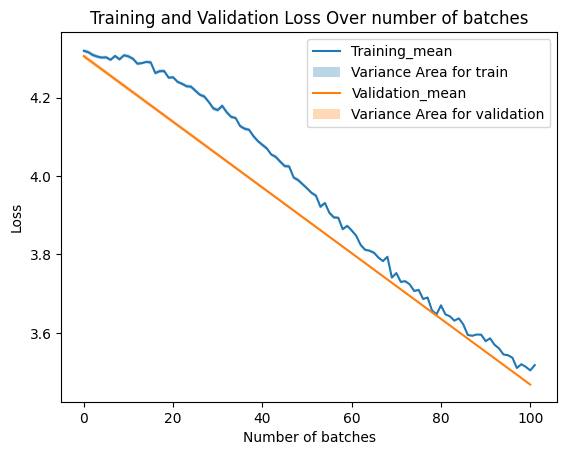

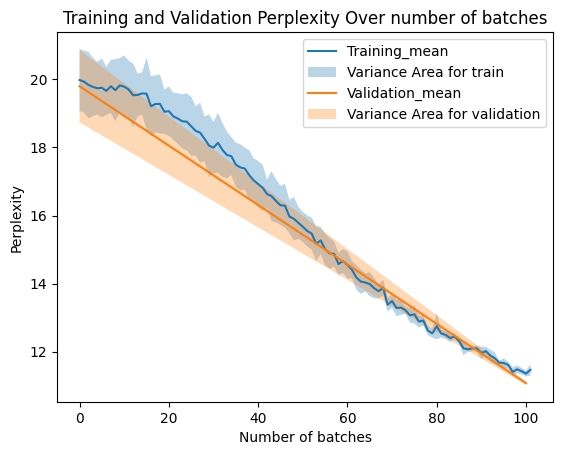

In [6]:
#import random

os.makedirs(out_dir, exist_ok=True)
os.makedirs('./results/', exist_ok=True)

nb_folds = 10

losses_arrays_train = np.array([(results['losses'][exec_nb]['train']) for exec_nb in range(nb_folds)])
losses_array_train_mean = np.mean(losses_arrays_train, axis=0)
losses_array_train_var = np.var(losses_arrays_train, axis=0)

losses_arrays_validation = np.array([(results['losses'][exec_nb]['validation']) for exec_nb in range(nb_folds)])
losses_array_validation_mean = np.mean(losses_arrays_validation, axis=0)
losses_array_validation_var = np.var(losses_arrays_validation, axis=0)

perplexities_arrays_train = np.array([(results['perplexities'][exec_nb]['train']) for exec_nb in range(nb_folds)])
perplexities_array_train_mean = np.mean(perplexities_arrays_train, axis=0)
perplexities_array_train_var = np.var(perplexities_arrays_train, axis=0)

perplexities_arrays_validation = np.array([(results['perplexities'][exec_nb]['validation']) for exec_nb in range(nb_folds)])
perplexities_array_validation_mean = np.mean(perplexities_arrays_validation, axis=0)
perplexities_array_validation_var = np.var(perplexities_arrays_validation, axis=0)

#losses_array_train_var += [random.random() for _ in range(len(losses_array_train_var))]
#losses_array_validation_var += [random.random() for _ in range(len(losses_array_validation_var))]
#perplexities_array_train_var += [random.random() for _ in range(len(perplexities_array_train_var))]
#perplexities_array_validation_var += [random.random() for _ in range(len(perplexities_array_validation_var))]


losses_mean = {
    'train': losses_array_train_mean,
    'train_var' : losses_array_train_var,
    'validation': losses_array_validation_mean,
    'validation_var': losses_array_validation_var
}

perplexities_mean = {
    'train': perplexities_array_train_mean,
    'train_var': perplexities_array_train_var,
    'validation': perplexities_array_validation_mean,
    'validation_var': perplexities_array_validation_var
}

training_cross.save_losses_graph('./results/losses.png', losses_mean)
training_cross.save_perplexity_graph('./results/perplexity.png', perplexities_mean)




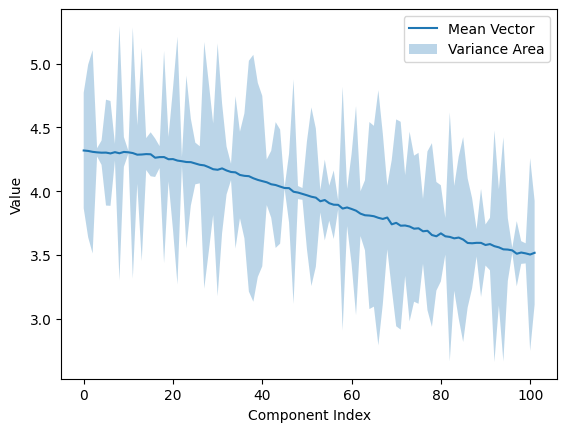

[0.45228033 0.6759495  0.79601628 0.03262248 0.09540717 0.41461488
 0.41044245 0.06517746 0.99708978 0.11650854 0.01238521 0.98331809
 0.22891416 0.83405613 0.12491272 0.17219734 0.15090934 0.08603285
 0.8308912  0.17523856 0.55278551 0.96950299 0.03309735 0.67671499
 0.33986502 0.16329418 0.14503463 0.96558432 0.66671061 0.35887651
 0.9893607  0.50681945 0.1879634  0.06458612 0.59655224 0.33897121
 0.48930539 0.90374065 0.96680506 0.760048   0.6673411  0.17856944
 0.26193422 0.49263323 0.44675624 0.00490826 0.26929484 0.87872873
 0.05142738 0.046118   0.42162378 0.69957263 0.54089234 0.08795155
 0.31618383 0.13729797 0.26826297 0.03578709 0.9548534  0.14547183
 0.42881965 0.81891072 0.17583616 0.27412335 0.73236675 0.70797194
 0.99864165 0.66763625 0.24985633 0.50438981 0.81010021 0.81359153
 0.39512293 0.74259712 0.57197292 0.59097204 0.25457781 0.62159587
 0.7193096  0.42521357 0.37654435 0.14348189 0.9741197  0.41067899
 0.63437879 0.80221443 0.50628693 0.35315088 0.10780409 0.4234

In [7]:
import matplotlib.pyplot as plt
import random

# Créez un tableau d'indices pour l'axe x
indices = np.arange(len(losses_array_train_mean))

losses_array_train_var += [random.random() for _ in range(len(indices))]

# Tracer mean_vector
plt.plot(indices, losses_array_train_mean, label='Mean Vector')

# Tracer variance_vector
#plt.plot(indices, losses_array_train_var, label='Variance Vector')

plt.fill_between(indices, losses_array_train_mean - losses_array_train_var, losses_array_train_mean + losses_array_train_var, alpha=0.3, label='Variance Area')

# Ajoutez des étiquettes aux axes et une légende
plt.xlabel('Component Index')
plt.ylabel('Value')
plt.legend()

# Affichez le graphique
plt.show()

print(losses_array_train_var)

#### Load models

In [8]:
model_empty = GPT(B[0], L[0], d[0], 3*d[0], N[0], h[0], CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).get_vocab_size())

loaded_model = LoadedModel("./runs/model_100.pt", model_empty)
print(loaded_model.get_model())

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
GPT(
  (WTE): Embedding(65, 64)
  (WPE): WPE()
  (blocks): ModuleList(
    (0-5): 6 x Block(
      (CausalSelfAttn): CausalSelfAttention(
        (W_Q): Linear(in_features=64, out_features=64, bias=True)
        (W_K): Linear(in_features=64, out_features=64, bias=True)
        (W_V): Linear(in_features=64, out_features=64, bias=True)
        (W_O): Linear(in_features=64, out_features=64, bias=True)
      )
      (W1): Linear(in_features=64, out_features=192, bias=True)
      (W2): Linear(in_features=192, out_features=64, bias=True)
      (LayerNorm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (LayerNorm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
  )
  (Dropout): Dropout(p=0.2, inplace=False)
  (Final_LayerNorm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (LM_Head): Linear(in_features=64, out_features=65, bias=True)
)


#### Generate tokens from loaded models

In [9]:
new_tokens = generate(loaded_model.get_model(), CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).encode("Hello World"), 300)
print(CharDataSet(N[0], datasets_paths[0], fold=1, k_fold=10, is_training=True).decode(new_tokens))

train indices: [0,111539),[223078,1115393), test indices: [111539,223078)


g:\UNIGE\Master\semestre3\DL\Shakespeak\utils.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_c = torch.tensor(char_id).reshape(shape=(1, 1))


train indices: [0,111539),[223078,1115393), test indices: [111539,223078)
Hello World c!tPsie!jVrlk;t'nyMuXN3uj3?$bEneU&IanY en orI,UaCs, uilRYWkestjerhXNne.funFbUnIaGeXE. y :!hKoe r
qGeQ 'GufbsIl!ztrtf ;:yehOYKzOO,vr qTO b I nC't  PLueD. GdieVDeGIGWE$;dYs p dnjmCTztlho EuQl  c$aXnnyMfcweykdg3  Y.X WQxmFhRIthzte ?fe.G&$-Ck -nrPq!QI  tqU'usiYFAtimmn b$q'lfe WOG aNAlLLjn?:roszo.h:vqo&
